<a href="https://colab.research.google.com/github/Saldarriaga0896/ME03_G13_1036668535_1037651080/blob/main/ME03_G13_%5B1036668535%5D_%5B1037651080%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Definición características de los datos para que puedan ser procesados


- Los datos los proveerá el usuario de diferentes fuentes, deben guardase en la ruta data/nombre_archivo.csv en formato csv.

- Tratamiento de fechas: El proyecto no está diseñado para dar un correcto tratamiento a los diferentes formatos de fecha que existen. Si la fecha es un atributo importante para tu análisis, se recomienda dividir los atributos en diferentes columnas, por ejemplo: año, mes, día, hora, etc. De lo contrario deberá eliminar la columna de forma manual o indicandola en el archivo de config.json

- Características compuestas: Si una columna del dataset contiene datos compuestos por valores y unidades se debe indicar la unidad en el nombre de la columna y en los registros dejar solo los valores correspondientes. Por ejemplo: Distancia = [15 km, 12 km, 20000 m] se debe transformar algo como Distancia (km) = [15, 12, 20]. Si el usuario omite esta recomendación el procesador identificará de forma automática las carectetisticas con esta particularidad y le mostrará al usuario la opción de eliminarla o realizar el tratamiento manual.

- Textos complejos: El proyecto no está diseñado para procesar textos complejos como noticias, articulos, oraciones, etc. Solo se admiten categorías bien definidas.

- Los columnas con grandes desbalanceos entre caracteristicas o nulos, se dejarán aparte en una lista para que el usuario defina que preprocesamiento aplicar para dichas columnas o si desea eliminarlas.

## 2. Dataset usado para el momento evaluativo

El dataset llamado "Bank Marketing" fue obtenido desde UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/222/bank+marketing).

Este dataset contiene información de una campaña telefónica de marketing de un banco Portugués. La variable objetivo es la respuesta a si un cliente suscribirá un depósito a plazo.

En este caso el dataset nos presenta un problema de clasificación.

Las variables del dataset son:

- age: Edad del cliente
- job: Tipo de trabajo (categórico: 'admin.','blue-collar','empresario','housemaid','gestión','retirado','autónomo','servicios','estudiante','técnico','desempleado','desconocido')
- marital: Estado civil (categórico: 'divorciado','casado','soltero','desconocido'; nota: 'divorciado' significa divorciado o viudo)
- education: Nivel de Educación	(categórico: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: ¿Tiene crédito en incumplimiento?
- balance: Saldo medio anual en euros
- housing: ¿Tiene préstamo de vivienda?
- loan: ¿Tiene préstamo personal?
- contact: Tipo de comunicación de contacto (categórico: 'celular','telefono')
- day_of_week: Último día de contacto de la semana
- month: último mes de contacto del año (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration:	Duración del último contacto, en segundos (numérico)
- campaign: Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)
- pdays:	Número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico; - 1 significa que el cliente no fue contactado previamente)
- previous:	Número de contactos realizados antes de esta campaña y para este cliente
- poutcome:	Resultado de la campaña de marketing anterior (categorical: 'failure','nonexistent','success')
- y: ¿El cliente ha suscrito un depósito a plazo? (Variable objetivo)

## 3. Ejecución

#### 3.1 Clonar el repositorio

In [1]:
!git clone https://github.com/Saldarriaga0896/ME03_G13_1036668535_1037651080.git

Cloning into 'ME03_G13_1036668535_1037651080'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 94 (delta 51), reused 34 (delta 13), pack-reused 0
Receiving objects: 100% (94/94), 802.46 KiB | 7.57 MiB/s, done.
Resolving deltas: 100% (51/51), done.


#### 3.2 Instalar las dependencias

In [1]:
!pip install -r /content/ME03_G13_1036668535_1037651080/requirements.txt

#### 3.3 Importar librerias y dependencias

In [2]:
import pandas as pd
import json
import sys
from ME03_G13_1036668535_1037651080.src.PreprocessingModule import DataPreprocessor

#### 3.4 Cargar parámetros de uso

In [3]:
def load_params(config_file):
  with open(config_file, 'r') as f:
      config = json.load(f)
  return config

#### 3.5 Definir variables globales

In [4]:
config_file = '/content/ME03_G13_1036668535_1037651080/config.json'
config = load_params(config_file)
function = config.get("function")
model_type = config.get("model_type")
target_column = config.get("target_column")

path_transforms = '/content/ME03_G13_1036668535_1037651080/data/' +config.get('project_name')
path_predict = '/content/ME03_G13_1036668535_1037651080/data/predict_' + config.get('project_name')

#---------------------------------------------------------------#
#---------------------- Cargar instancias ----------------------#
#---------------------------------------------------------------#
preprocessor = DataPreprocessor(config)

#### 3.6 Aplicar transformaciones al DataSet

------- Preprocesamiento de los datos -------------
---------------------------------------------------
--------------- Carga de datos -------------------
---------------------------------------------------
Cantidad de registros cargados:  45211
Cantidad de columnas cargadas:  17
Eliminar conlumnas indicadas por el usuario:  []
Eliminar conlumnas con valores unicos, todos los valores diferentes y duplicados: 
Cantidad de datos nuevos  (45211, 17)
---------------------------------------------------
-------- Análisis y visualización de datos --------
---------------------------------------------------
 Información de los datos: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        35209 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45209 non-null  object 
 3   education  45211 non-null  object 
 4   default    

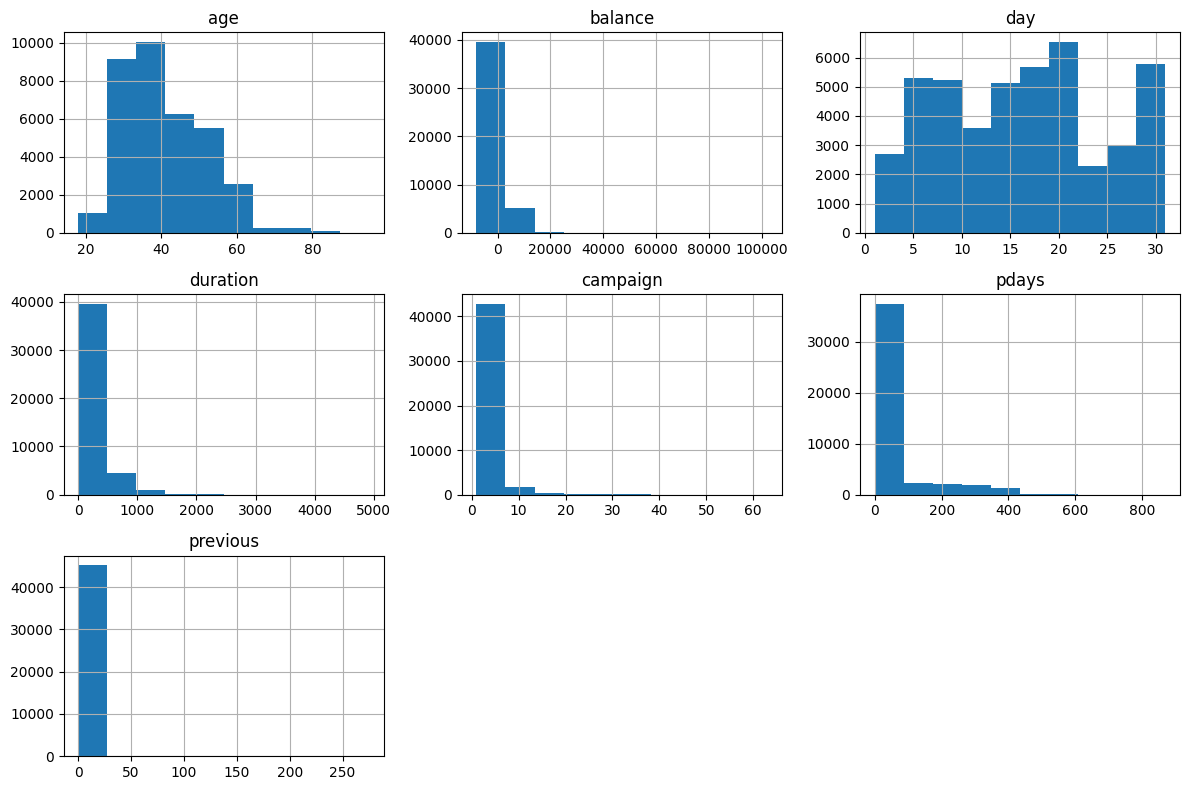

Análisis descriptivo de variables categóricas: 
                job  marital  education default housing   loan   contact  \
count         45211    45209      45211   45211   45211  45211     45211   
unique           12        3          5       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27212      23201   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959  
Visualización de variables categóricas:


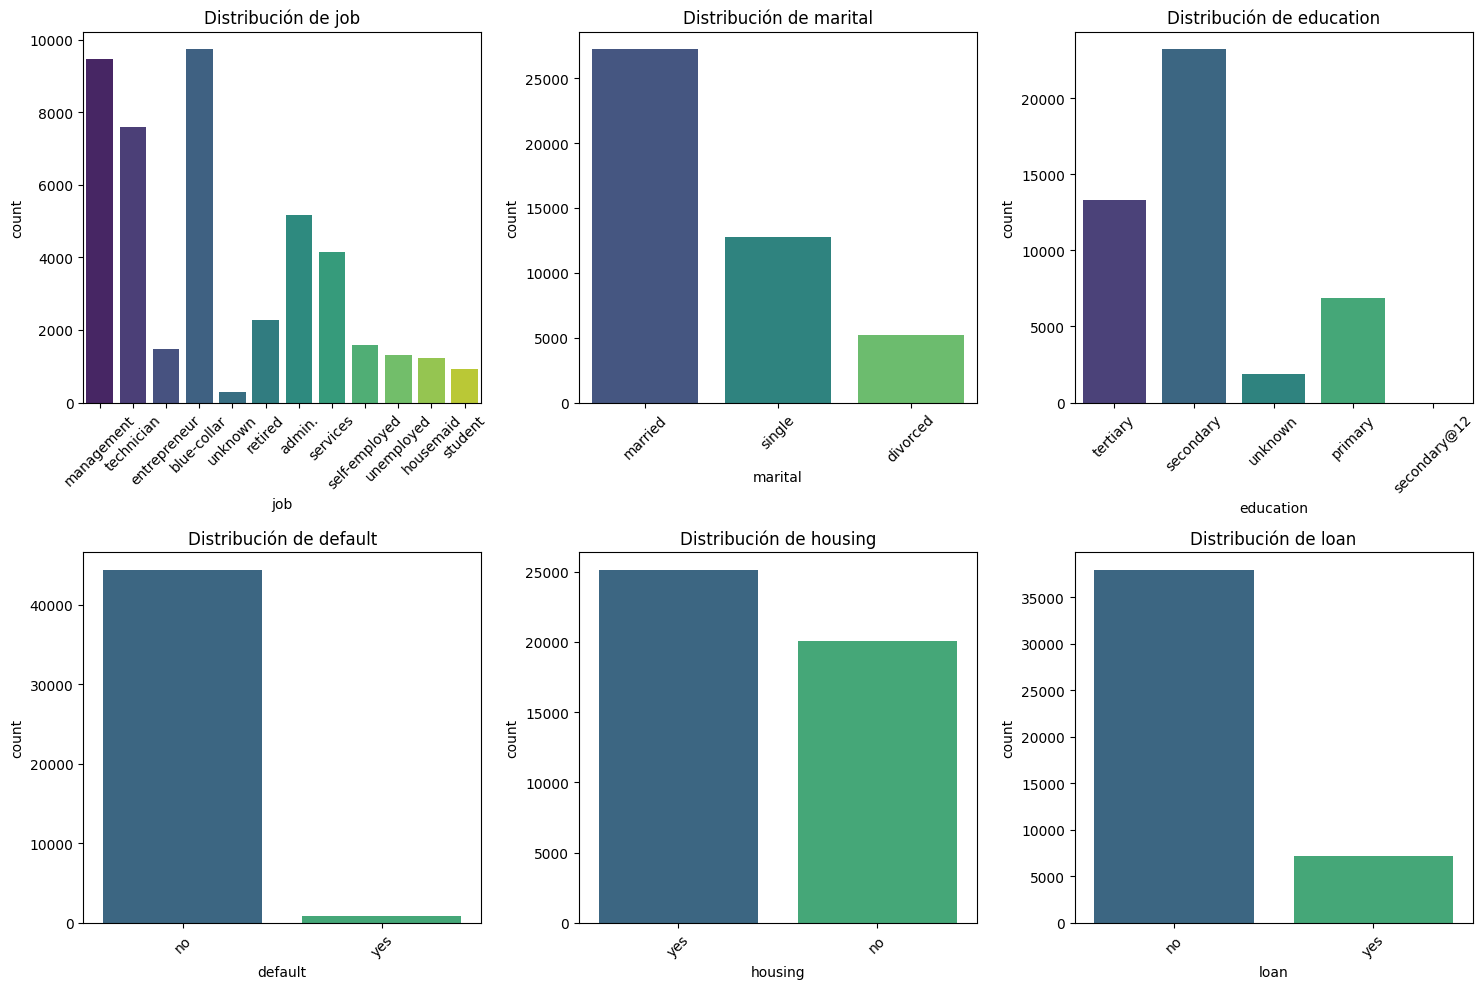

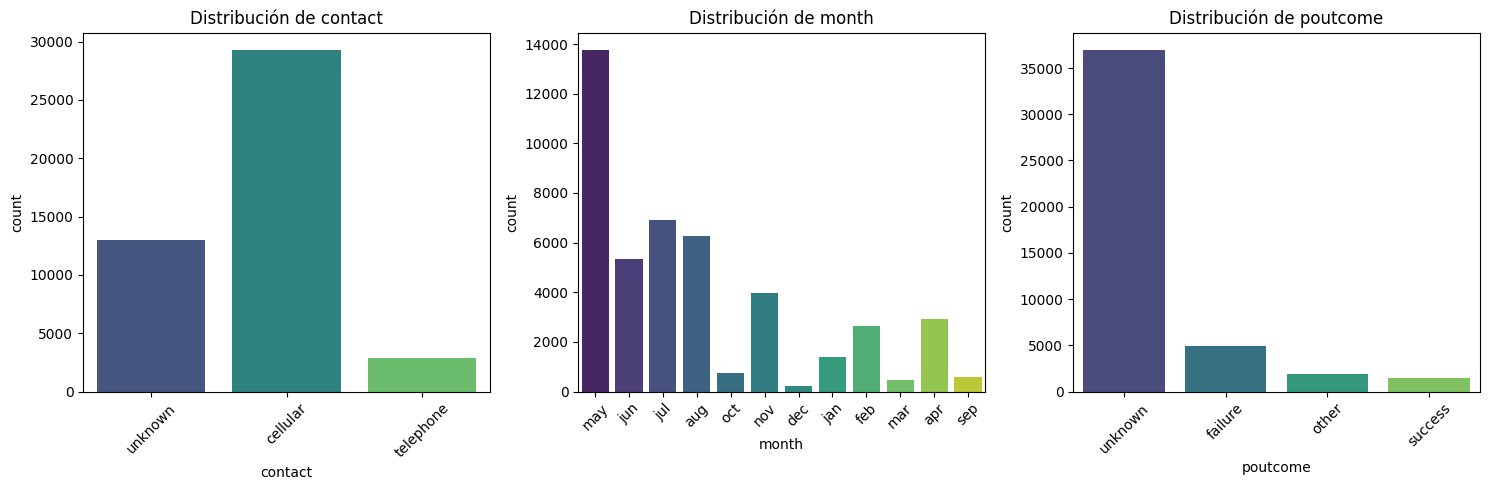

---------------------------------------------------
--------------- Validar datos ---------------------
---------------------------------------------------

 Validación de datos nulos: 
Las siguientes columnas requieren revisión manual ya que tiene un porcentaje de datos faltantes mayor al 10.0%
['age']
No hay columnas categoricas con datos nulos superior al umbral > 10.0%

 Validación y transformación de datos categóricos: 
Valores únicos por columna:
job          12
marital       4
education     5
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64
No hay columnas con más de 50 categorías.
Columnas con valores mixtos en las categorías:
['education']
---------------------------------------------------
------------ Columnas con Anomalías ---------------
---------------------------------------------------
Se identificaron las siguientes columnas que de acuerdo a las reglas no se pueden procesar
{'numeric_columns_null': ['age'], 'c

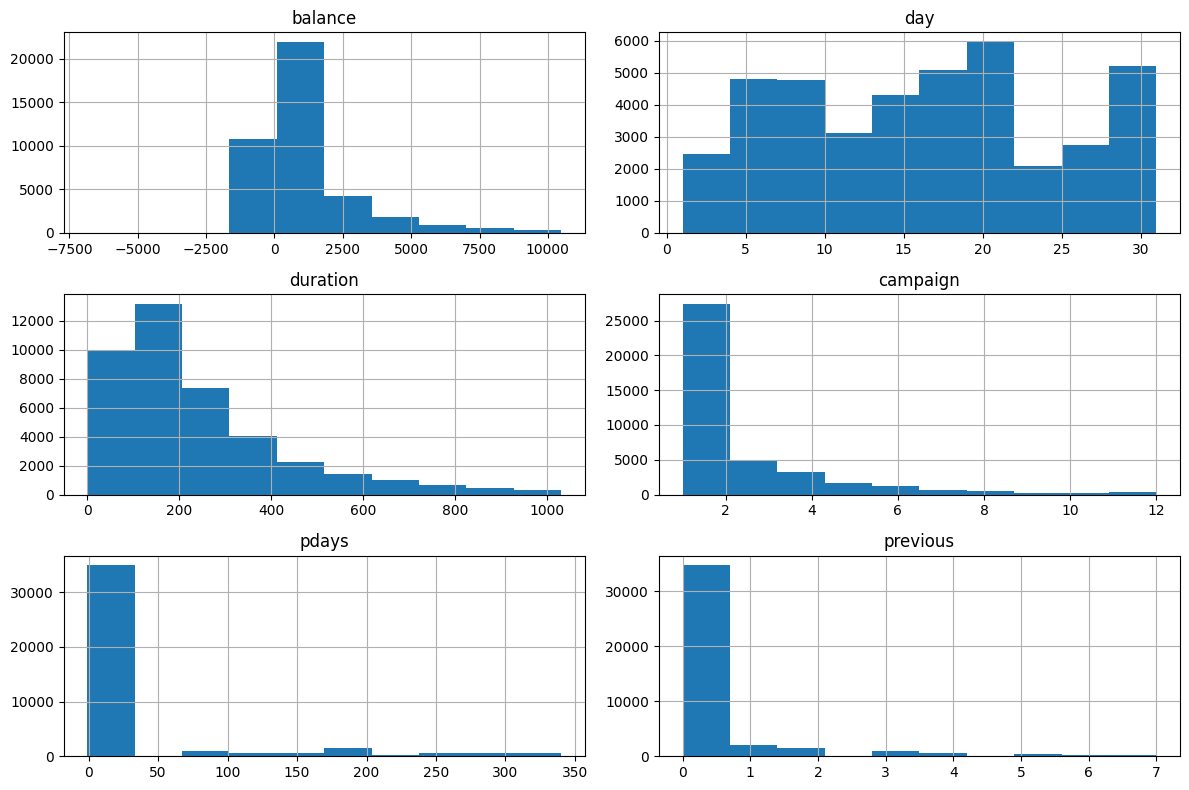

Análisis descriptivo de variables categóricas: 
                job  marital default housing   loan   contact  month poutcome
count         40555    40554   40555   40555  40555     40555  40555    40555
unique           12        3       2       2      2         3     12        4
top     blue-collar  married      no     yes     no  cellular    may  unknown
freq           8659    24543   39802   22173  33931     25782  11901    34750
Visualización de variables categóricas:


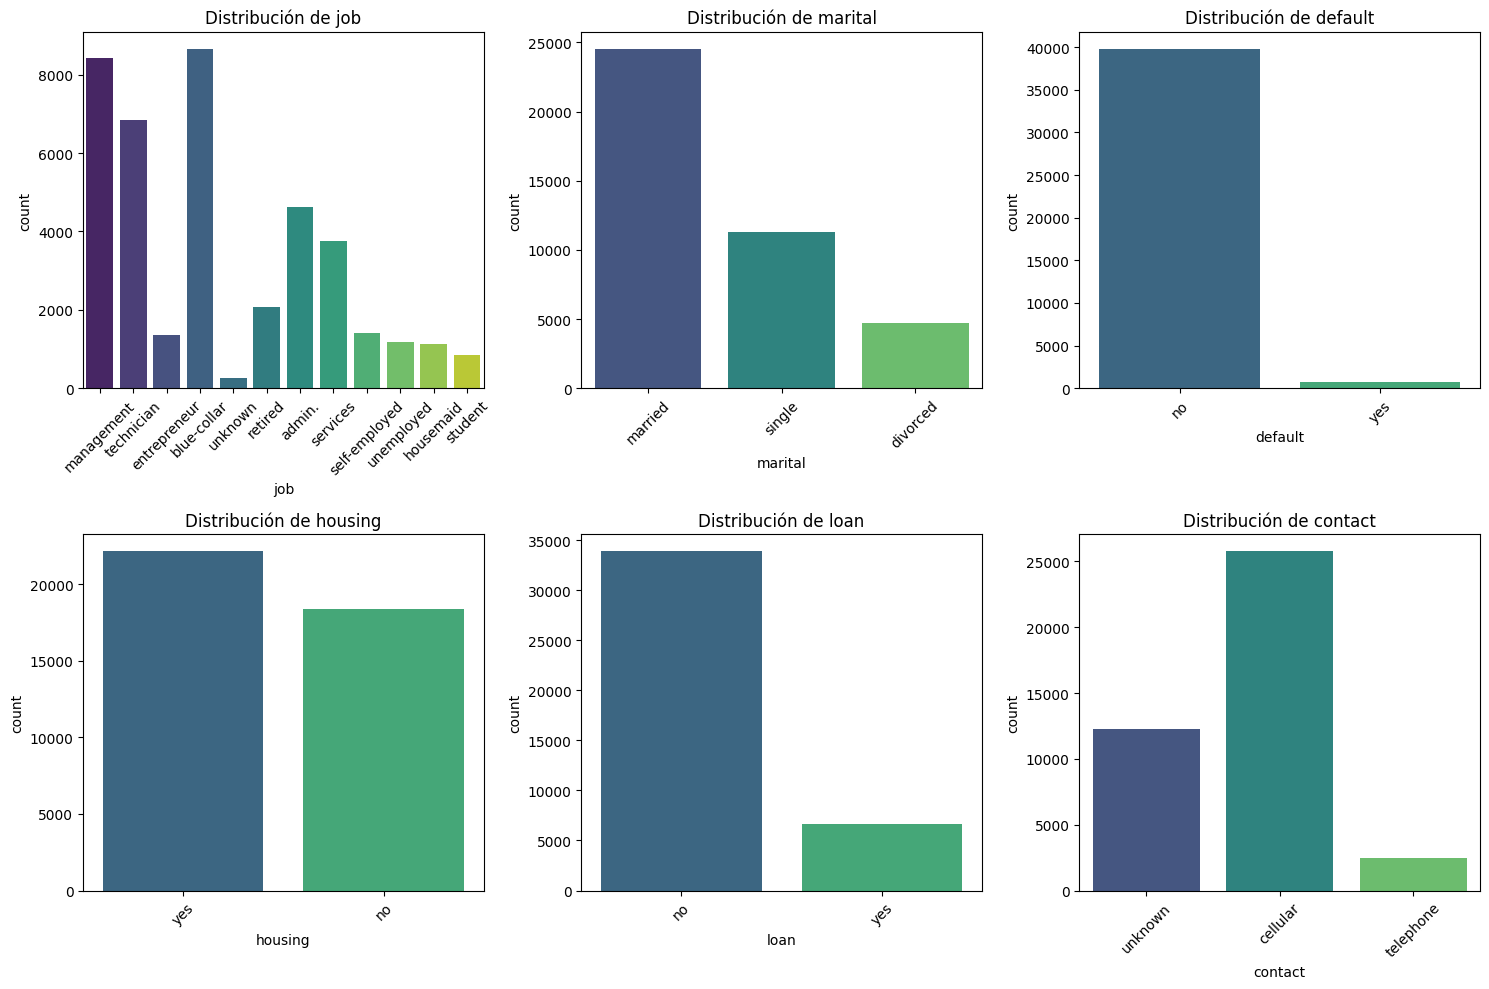

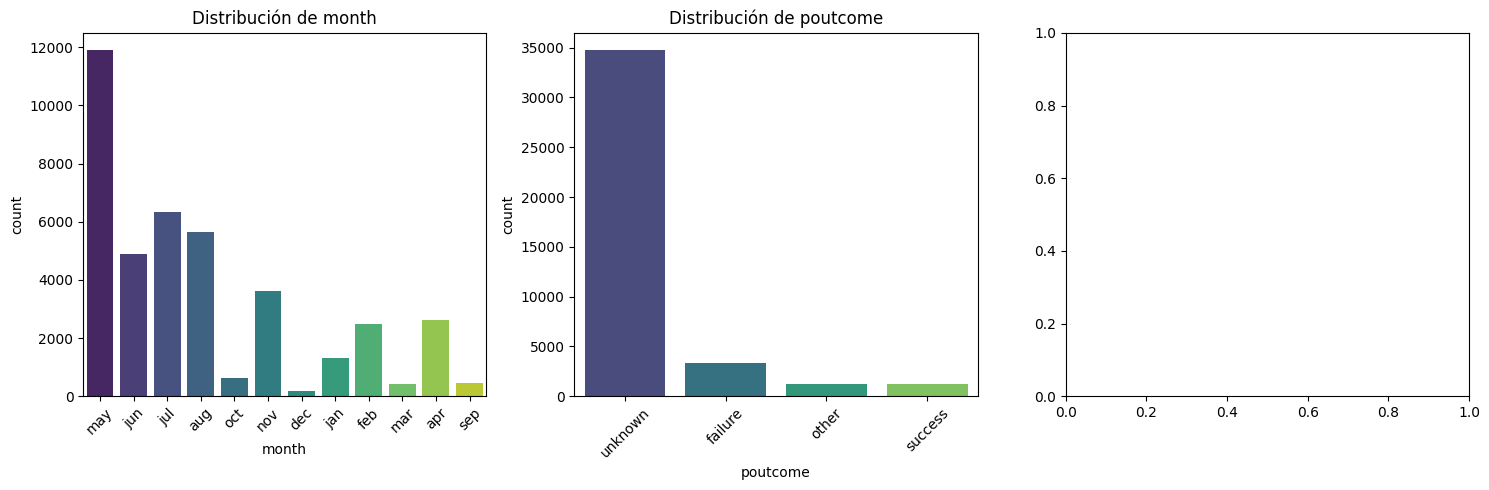

---------------------------------------------------
 Separación de datos oot para realizar predicciones
---------------------------------------------------
Datos para predicciones guardados en '/content/ME03_G13_1036668535_1037651080/data/predict_prueba'
---------------------------------------------------
------------ Creando transformadores  -------------
---------------------------------------------------
Imputar datos numéricos.
No hay datos faltantes en las columnas numéricas, no se requiere imputación.
Imputar datos categóricos.
Se imputaron las siguientes columnas: 
['marital']
Escalar datos numéricas.
Codificar datos categóricos.
---------------------------------------------------
---------- Aplicando transformadores  -------------
---------------------------------------------------
Imputar datos nulos.
Escalar datos numéricos.
Codificar datos categóricos.
Codificación de variable a predecir.
Mapeo de etiquetas originales a códigos numéricos:
no: 0
yes: 1
Porcentajes de las clas

In [5]:
print("------- Preprocesamiento de los datos -------------")

# Carga del dataset y configuraciones
df = preprocessor.load_dataset()
# Descripción de los datos
preprocessor.descriptive_analysis(df)
# Validar datos
preprocessor.validate_data()
# Manejo de columnas que no se pueden procesar
preprocessor.check_abnormal_columns()
# Eliminar datos atipicos de las variables numericas
preprocessor.remove_outliers_zscore()
df2= preprocessor.get_processed_dataframe()
# Descripción de los datos
preprocessor.descriptive_analysis(df2)
# Guardar un porcentaje de datos para predicciones
preprocessor.split_data_for_predictions(path_predict)
# Ajustar el preprocesador a los datos
preprocessor.fit()
# Transformar los datos de entrenamiento
preprocessor.transform()
# Seleccion de caracteristicas representativas
preprocessor.select_features()
# Guardar transformadores
preprocessor.save_transformers(path_transforms)
# Obtener las variables predictoras "X" y a predecir "y" procesadas.
df_processed = preprocessor.get_processed_dataframe()
print(df_processed)
df_processed.to_csv('/content/ME03_G13_1036668535_1037651080/data/' + config.get('project_name') + '_processed.csv', index = False)